In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import preprocessing as ps
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")

In [43]:
df=pd.read_csv('../datasets/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


<h3>Dataset Overview</h3>

In [44]:
ps.dataset_analysis(df,target_column='price')


Dataset Shape (Rows & Columns)
Rows :- 193573
Columns :- 11
Unique Rows: 193573 (100.00%)
Duplicate Rows: 0 (0.00%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
float64    6
object     3
int64      2
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : cut, color, clarity


Discrete Numeric Columns : price


Continuous Columns : id, carat, depth, table, x, y, z


Unknown Columns : -----

Skewness of Numerical Columns
id: 0.00 -> Approximately Symmetric. 
carat: 1.00 -> Mild Positive Skew. 
depth: -0.28 -> Approximately Symmetric. 
table: 0.62 -> Mild Positive Skew. 
x: 0.36 -> Approximately Symmetric. 
y: 0.36 -> Approximately Symmetric. 
z: 0.69 -> Mild Positive Skew. 

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
cut: ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

color: ['D', 'E', 'F', 'G', 'H', 'I', 'J']

clarity: ['I1', 'IF', 'SI1', 'SI2', '

<h3>Data Preprocessing & EDA</h3>

In [45]:
df=df.drop(columns='id',axis=1)
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


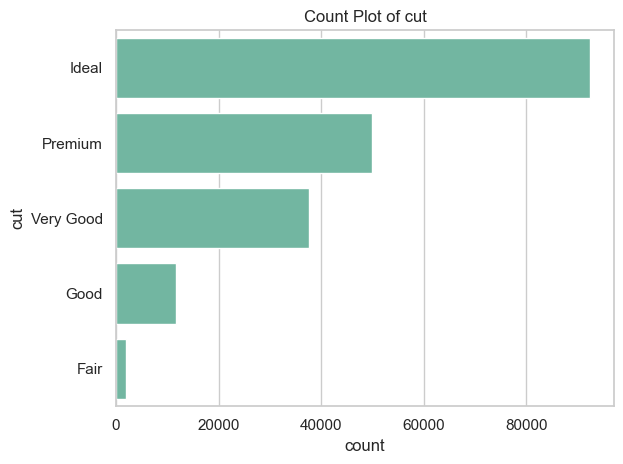

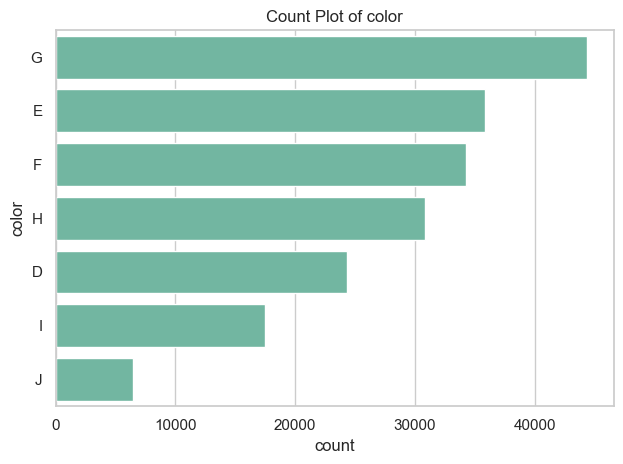

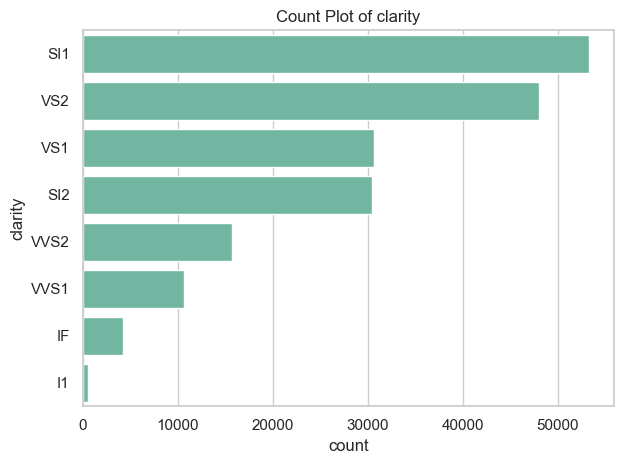

In [46]:
for col in df.select_dtypes(include='object').columns:
    # Get value counts and sort (descending by default)
    sorted_order = df[col].value_counts().index

    # Plot with sorted order
    sns.countplot(data=df, y=col, order=sorted_order)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [48]:
df.select_dtypes(include=['float64','int64']).columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

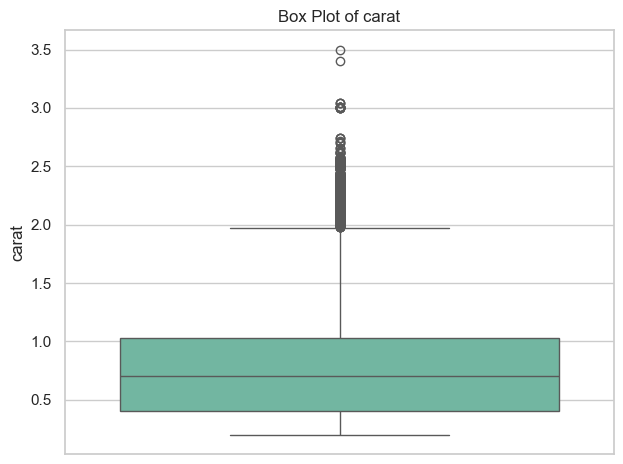

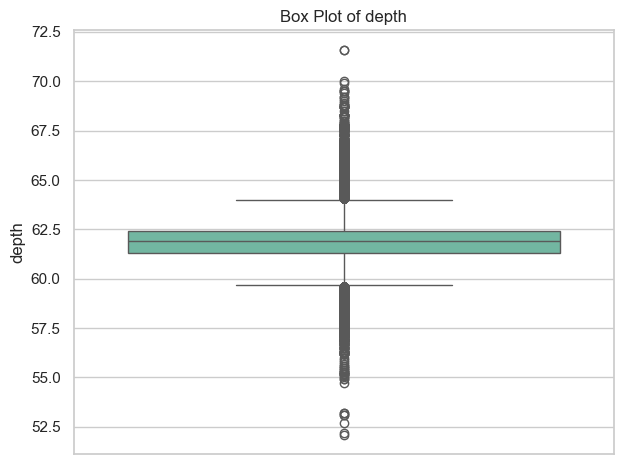

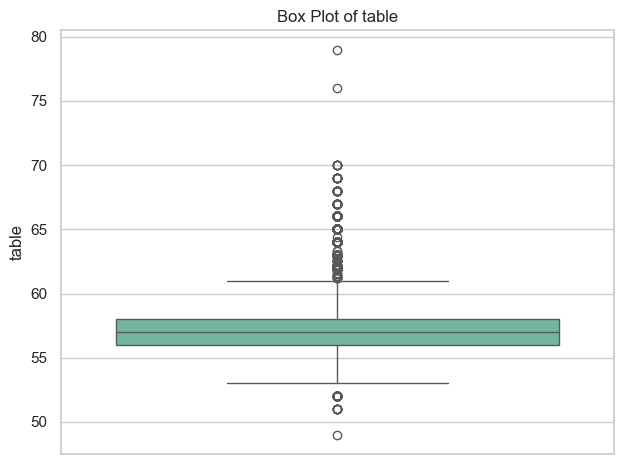

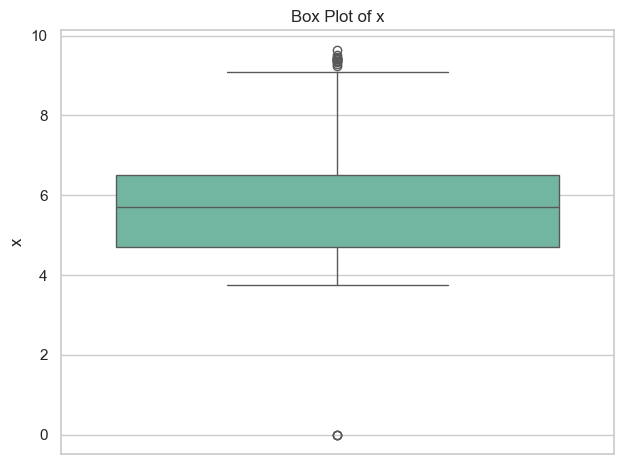

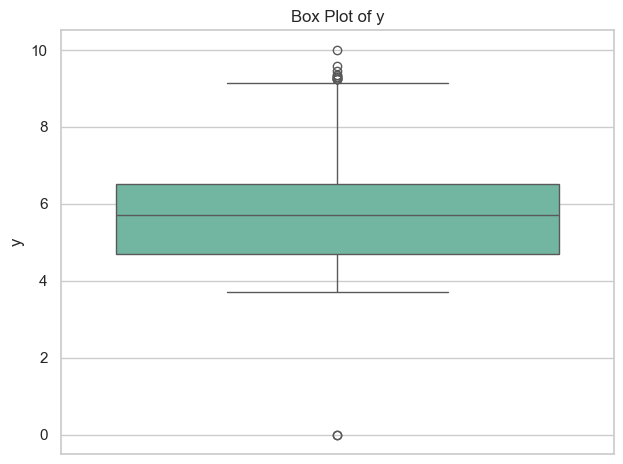

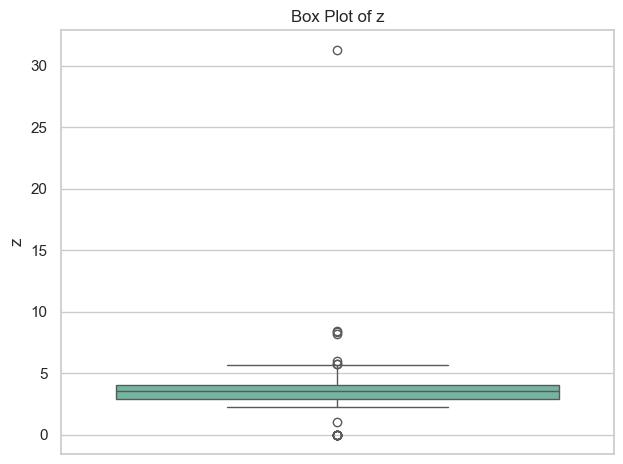

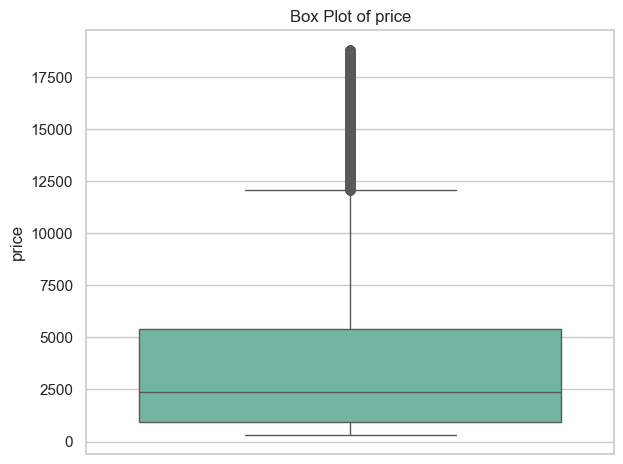

In [49]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [50]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [51]:
df.shape

(193573, 10)

In [52]:
#outlier Records
print(df[df['carat']>3].shape)
print(df[(df['depth']>70) |(df['depth']<53)].shape)
print(df[(df['table']>70) |(df['table']<50)].shape)
print(df[(df['x']<2)].shape)
print(df[(df['y']<2)].shape)
print(df[(df['z']<2) |(df['z']>7)].shape)


(12, 10)
(5, 10)
(3, 10)
(3, 10)
(2, 10)
(15, 10)


In [53]:
# Combined outlier condition
outliers = (
    (df['carat'] > 3) |
    (df['depth'] > 70) | (df['depth'] < 53) |
    (df['table'] > 70) | (df['table'] < 50) |
    (df['x'] < 2) |
    (df['y'] < 2) |
    (df['z'] < 2) | (df['z'] > 7)
)

# Remove outliers
df = df[~outliers]


In [54]:
df.shape

(193538, 10)

In [55]:
df.select_dtypes(include='object').columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=encoder.fit_transform(df[i])

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453


In [59]:
df.corr()


,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.081779,0.292193,-0.209123,0.027996,0.225766,0.980839,0.980396,0.980079,0.943451
cut,0.081779,1.000000,0.019947,-0.036134,-0.126434,0.313423,0.082272,0.084122,0.070852,0.070945
color,0.292193,0.019947,1.000000,0.018962,0.035685,0.034974,0.269172,0.269285,0.271395,0.210631
clarity,-0.209123,-0.036134,0.018962,1.000000,-0.048844,-0.104362,-0.228930,-0.228196,-0.232143,-0.092094
depth,0.027996,-0.126434,0.035685,-0.048844,1.000000,-0.231064,-0.010511,-0.011403,0.082183,0.002032
table,0.225766,0.313423,0.034974,-0.104362,-0.231064,1.000000,0.237779,0.233445,0.213629,0.174964
x,0.980839,0.082272,0.269172,-0.228930,-0.010511,0.237779,1.000000,0.999205,0.995203,0.901088
y,0.980396,0.084122,0.269285,-0.228196,-0.011403,0.233445,0.999205,1.000000,0.995114,0.901075
z,0.980079,0.070852,0.271395,-0.232143,0.082183,0.213629,0.995203,0.995114,1.000000,0.898112
price,0.943451,0.070945,0.210631,-0.092094,0.002032,0.174964,0.901088,0.901075,0.898112,1.000000


In [60]:
df.to_csv('../datasets/clean_dataset.csv')
